In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
dataset = pd.read_csv('/content/grive/MyDrive/CCF/Credit_Card_Applications.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y) 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)

   CustomerID  A1     A2     A3  A4  A5  ...  A10  A11  A12  A13   A14  Class
0    15776156   1  22.08  11.46   2   4  ...    0    1    2  100  1213      0
1    15739548   0  22.67   7.00   2   8  ...    0    0    2  160     1      0
2    15662854   0  29.58   1.75   1   4  ...    0    1    2  280     1      0
3    15687688   0  21.67  11.50   1   5  ...   11    1    2    0     1      1
4    15715750   1  20.17   8.17   2   6  ...   14    0    2   60   159      1

[5 rows x 16 columns]

Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.000000

In [ ]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

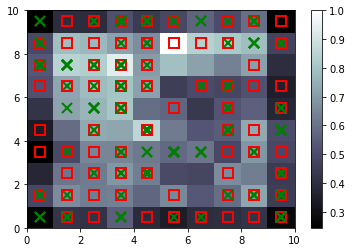

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'x']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)
frauds = np.concatenate((mappings[(1,2)], mappings[(6,8)]), axis = 0)

frauds = sc.inverse_transform(frauds)
print("\n\n\n\nFrauds customers are:\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(1, 1): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
       5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
       0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
       0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.63723877, 1.        , 0.31954887, 0.08928571, 0.5       ,


In [ ]:
customers = dataset.iloc[:,1:].values 
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
df = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df

,Customers,Fraud_probability
0,15646563.0,0.000000
1,15696287.0,0.000000
2,15588123.0,0.000000
3,15725002.0,0.000000
4,15735837.0,0.000000
...,...,...
685,15790689.0,0.074542
686,15735221.0,0.080133
687,15611682.0,0.082891
688,15737627.0,0.095229
